In [9]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing,svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [10]:
dataset=pd.read_csv('CRData16.csv')

In [11]:
x = dataset.iloc[:,[4,8]].values
y = dataset.iloc[:,20].values

In [12]:
logreg = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0)

In [13]:
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
y_pred=logreg.predict(x_test)

In [15]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[23,  2],
       [ 0, 67]], dtype=int64)

Text(0.5,257.44,'Predicted label')

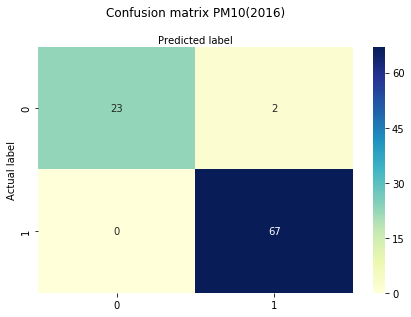

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix PM10(2016)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9782608695652174
Precision: 0.9710144927536232
Recall: 1.0


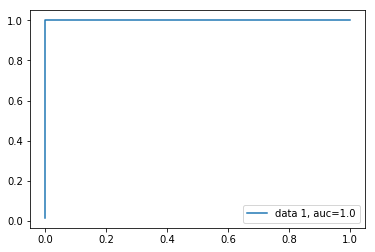

In [18]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()